In [61]:
import numpy as np
import pandas as pd

In [62]:
data = pd.read_csv('games-release-ALL.csv')
data.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%


In [63]:
data.isna().sum()

Unnamed: 0          0
game                0
link                0
release             0
peak_players        0
positive_reviews    0
negative_reviews    0
total_reviews       0
rating              0
dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [65]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%


In [66]:
data = data[:20000]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game              20000 non-null  object
 1   link              20000 non-null  object
 2   release           20000 non-null  object
 3   peak_players      20000 non-null  object
 4   positive_reviews  20000 non-null  object
 5   negative_reviews  20000 non-null  object
 6   total_reviews     20000 non-null  object
 7   rating            20000 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [67]:
columns_with_comma = ['peak_players', 'positive_reviews', 'negative_reviews']

data[columns_with_comma] = data[columns_with_comma].replace({',': ''}, regex=True)
# Convert the columns to numeric (optional, if needed)
data[columns_with_comma] = data[columns_with_comma].apply(pd.to_numeric, errors='ignore')
data.head()

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,Pizza Tower,/app/2231450/,Jan 26 2023,4529,19807,227,227,96.39%
1,Resident Evil 4,/app/2050650/,Mar 24 2023,168191,61752,1616,"1,616",95.75%
2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,15543,12643,213,213,95.54%
3,Pineapple on pizza,/app/2263010/,Mar 28 2023,1415,11717,209,209,95.39%
4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,6132,14152,324,324,95.09%


In [68]:
data['total_reviews'] = data['positive_reviews'] + data['negative_reviews']
data.head()

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,Pizza Tower,/app/2231450/,Jan 26 2023,4529,19807,227,20034,96.39%
1,Resident Evil 4,/app/2050650/,Mar 24 2023,168191,61752,1616,63368,95.75%
2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,15543,12643,213,12856,95.54%
3,Pineapple on pizza,/app/2263010/,Mar 28 2023,1415,11717,209,11926,95.39%
4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,6132,14152,324,14476,95.09%


In [69]:
# Drop name and link to the game
data = data.drop(['game', 'link'], axis=1)
data.head()

,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,Jan 26 2023,4529,19807,227,20034,96.39%
1,Mar 24 2023,168191,61752,1616,63368,95.75%
2,Mar 31 2023,15543,12643,213,12856,95.54%
3,Mar 28 2023,1415,11717,209,11926,95.39%
4,Jan 25 2023,6132,14152,324,14476,95.09%


In [70]:
# Convert date
data['release'] = pd.to_datetime(data['release'])
data['release_year'] = data['release'].apply(lambda x: x.year)
data['release_month'] = data['release'].apply(lambda x: x.month)
data['release_day'] = data['release'].apply(lambda x: x.day)
data = data.drop('release', axis=1)
data.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating,release_year,release_month,release_day
0,4529,19807,227,20034,96.39%,2023,1,26
1,168191,61752,1616,63368,95.75%,2023,3,24
2,15543,12643,213,12856,95.54%,2023,3,31
3,1415,11717,209,11926,95.39%,2023,3,28
4,6132,14152,324,14476,95.09%,2023,1,25


In [71]:
data['rating'] = data['rating'].replace({'%': ''}, regex=True)
data['rating'] = data['rating'].apply(pd.to_numeric, errors='ignore')
data.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating,release_year,release_month,release_day
0,4529,19807,227,20034,96.39,2023,1,26
1,168191,61752,1616,63368,95.75,2023,3,24
2,15543,12643,213,12856,95.54,2023,3,31
3,1415,11717,209,11926,95.39,2023,3,28
4,6132,14152,324,14476,95.09,2023,1,25


In [72]:
data = data.apply(pd.to_numeric, errors='ignore')
data.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating,release_year,release_month,release_day
0,4529,19807,227,20034,96.39,2023,1,26
1,168191,61752,1616,63368,95.75,2023,3,24
2,15543,12643,213,12856,95.54,2023,3,31
3,1415,11717,209,11926,95.39,2023,3,28
4,6132,14152,324,14476,95.09,2023,1,25


### Target Frequency

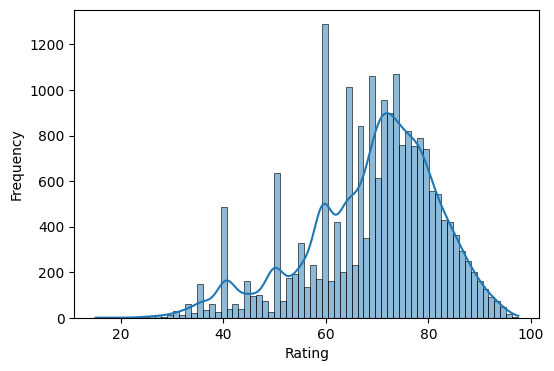

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.histplot(data["rating"], kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Correlation matrix

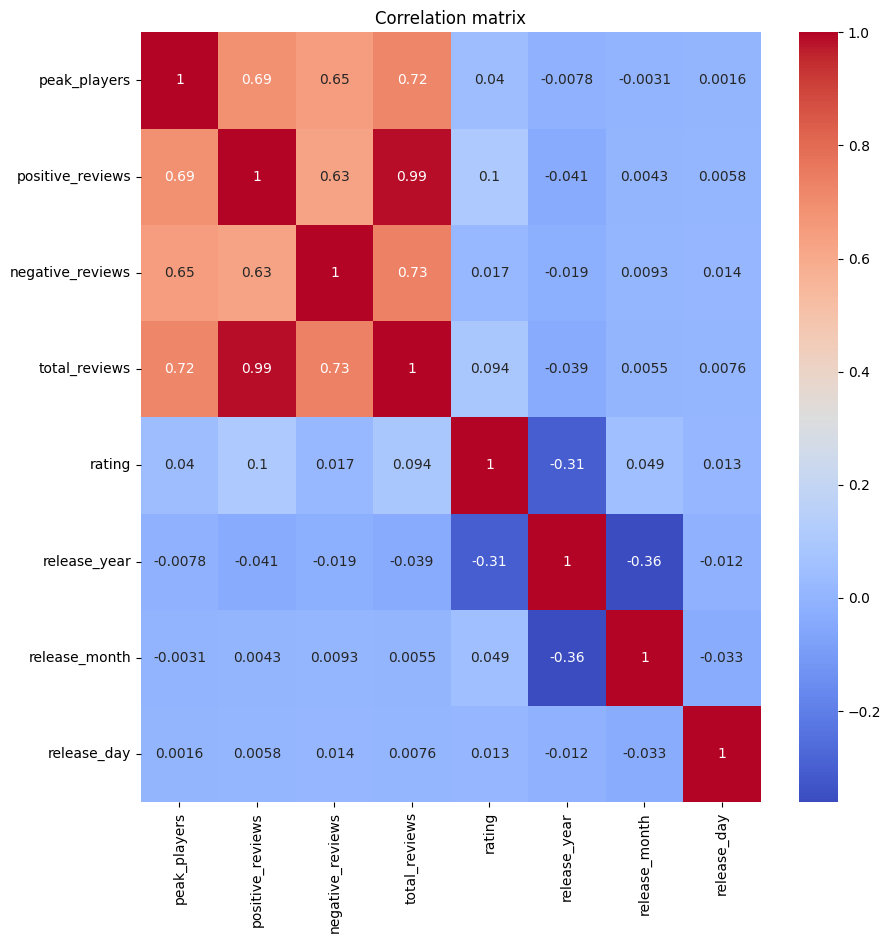

In [74]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

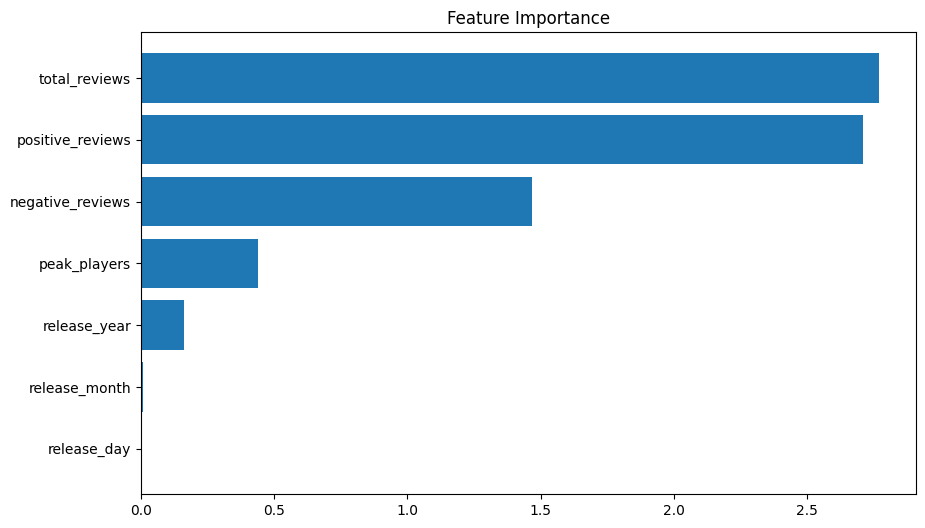

In [75]:
from sklearn.feature_selection import mutual_info_regression

x = data.drop('rating', axis=1)
y = data['rating']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train 
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.show()

In [76]:
data = data.drop(['release_month', 'release_day', 'total_reviews'], axis=1)
data.head()

,peak_players,positive_reviews,negative_reviews,rating,release_year
0,4529,19807,227,96.39,2023
1,168191,61752,1616,95.75,2023
2,15543,12643,213,95.54,2023
3,1415,11717,209,95.39,2023
4,6132,14152,324,95.09,2023


### Outliers

<Axes: xlabel='release_year'>

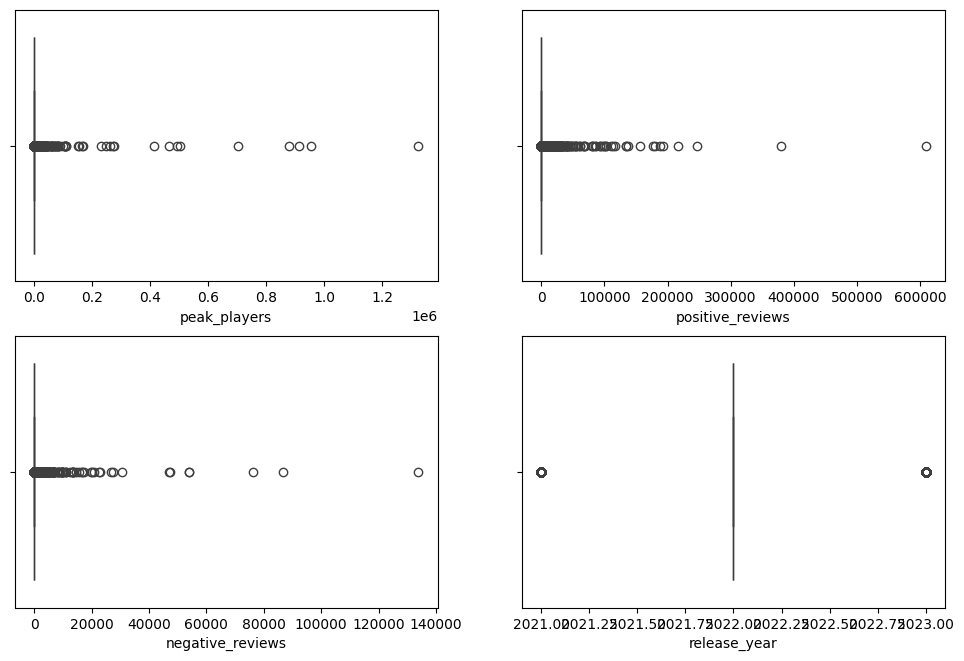

In [77]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='peak_players')

plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='positive_reviews')

plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='negative_reviews')

plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='release_year')

In [18]:
# def handle_outliers(data, column):
#     q1 = data[column].quantile(0.25) # Определение 25% процентиль
#     q3 = data[column].quantile(0.75) # Определение 75% процентиль
#     iqr = q3 - q1 # Определение размера ящика
#     lower_whisker = q1 - 1.5 * iqr # Определение нижнего усика
#     upper_whisker = q3 + 1.5 * iqr # Определение верхнего усика
#     # Вариант 1: Замена выбросов значениями границ усов (если точки находятся за пределами усов, то тогда заменяем их на граничные значения усов)
#     data[column] = data[column].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

# handle_outliers(data, 'peak_players')
# handle_outliers(data, 'positive_reviews')
# handle_outliers(data, 'negative_reviews')

# plt.figure(figsize=(4, 3))
# sns.boxplot(data=data, x='peak_players')

# plt.figure(figsize=(4, 3))
# sns.boxplot(data=data, x='positive_reviews')

# plt.figure(figsize=(4, 3))
# sns.boxplot(data=data, x='negative_reviews')

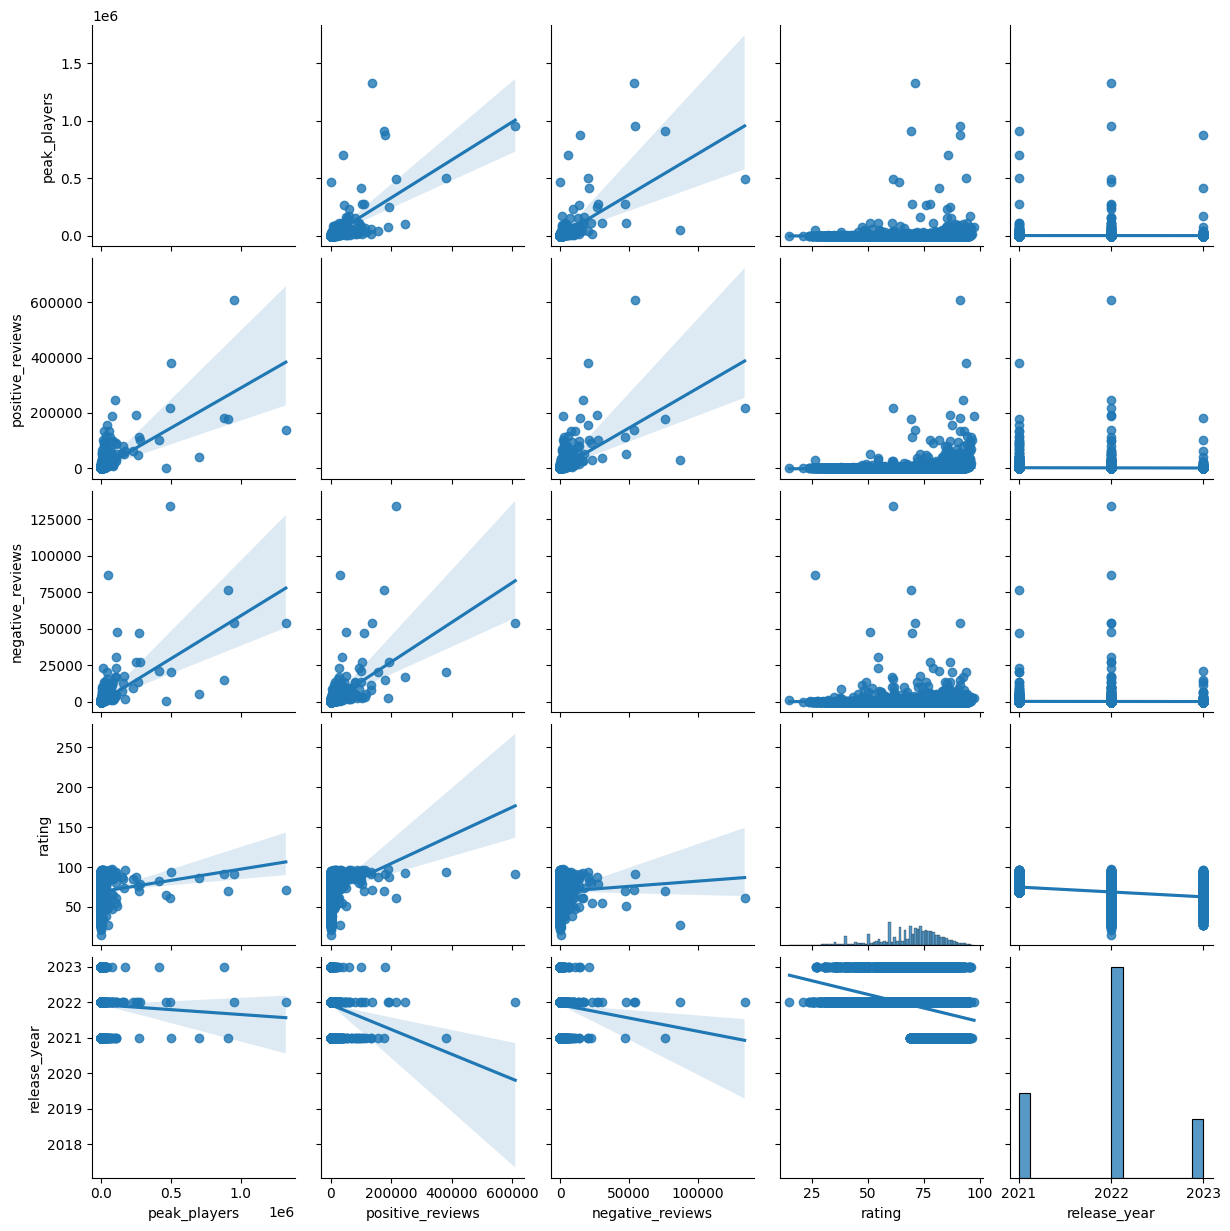

In [59]:
sns.pairplot(data, kind="reg") 

In [126]:
data.head()

,peak_players,positive_reviews,negative_reviews,rating,release_year
0,4529,19807,227,96.39,2023
1,168191,61752,1616,95.75,2023
2,15543,12643,213,95.54,2023
3,1415,11717,209,95.39,2023
4,6132,14152,324,95.09,2023


In [134]:
from sklearn.preprocessing import StandardScaler

scaler_linear = StandardScaler()

x = data.drop(['rating', 'release_year'], axis=1)
y = data['rating']
# Compute the mean and standard deviation of the training set then transform it
x = scaler_linear.fit_transform(x)

### Split

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=50)

In [138]:
result = pd.DataFrame({'Model':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)

    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test,y_hat)
    return test_mse, test_mae, test_r2

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in tqdm(models):
    test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), test_mse, test_mae, test_r2] 

 57%|█████▋    | 4/7 [00:11<00:10,  3.58s/it]c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 7/7 [00:18<00:00,  2.68s/it]


In [141]:
result.sort_values(by=['MSE', 'MAE'])

,Model,MSE,MAE,R2
2,RandomForestRegressor(),0.423048,0.115145,0.997317
1,DecisionTreeRegressor(),1.013759,0.234386,0.993570
4,KNeighborsRegressor(),1.414174,0.333640,0.991031
6,GradientBoostingRegressor(),1.767761,0.707515,0.988788
5,MLPRegressor(),118.701633,8.518563,0.247143
3,SVR(),144.106733,8.914548,0.086013
0,LinearRegression(),156.243492,9.727634,0.009037


In [142]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [143]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [144]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, round(input)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input), round(input / 2)),
                                 nn.LeakyReLU(),
                                 nn.Linear(round(input / 2), 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [145]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=3, out_features=2, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [146]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-3)
loss_func = nn.MSELoss()

In [147]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [148]:
num_iter = 3000
losses = []
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Model training:   0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15000])) that is different to the input size (torch.Size([15000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training: 100%|██████████| 3000/3000 [00:25<00:00, 115.80it/s, Current error = 169.26583862304688]


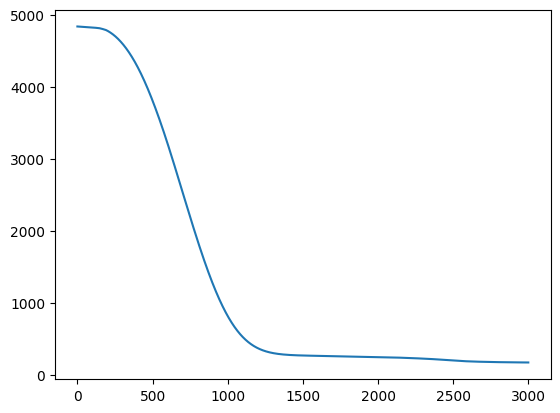

In [149]:
plt.plot(losses)

In [150]:
df = data.copy()

In [169]:
import random 
j = random.randint(0, len(y_test)-1)

print(f"\nReal rating = {y_test[j].item()}")
print(f"Predicted rating = {model_nn(x_test[j]).item()}")


Real rating = 55.689998626708984
Predicted rating = 69.5685043334961


In [172]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)
r2 = r2_score(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}")
print(r2)

mse =	175.661376953125
mae =	10.177240371704102
-0.11411992256035752
